Existen 50 personas en sala de espera, todos manifestando una gripa fuerte. Se le contrata para diseñar
un sistema que le permita discernir quiénes debe ir a sala COVID y quienes deben acudir a urgencias.
Este sistema debe evaluar:
a. Índice de saturación de oxígeno en la sangre: Si la sangre se encuentra por debajo de 90, se
le debe indicar al paciente que debe ir a sala COVID.
b. Cantidad de vacunas: Si el paciente tiene menos de 2 vacunas, se le debe indicar que debe ir
a la sala COVID.
c. Prueba de COVID: Se aplica si los dos indicadores anteriores no son concluyentes. Si sale
positiva, se le debe pedir al paciente ir a sala COVID.
d. Si ninguna de las tres preguntas anteriores es positiva, se le debe indicar al paciente acudir a
urgencias.
e. Considere que sólo hay 10 camillas disponibles en urgencias. Cuando las camillas se llenen,
el sistema debe indicar al resto de usuarios que deben esperar para su tratamiento.

Archivo 'entrada_pacientes_poo.csv' generado exitosamente.
Archivo 'resultados_pacientes_poo.csv' generado exitosamente con los destinos de los pacientes.
Histograma de destinos guardado como 'histograma_destinos.png'.


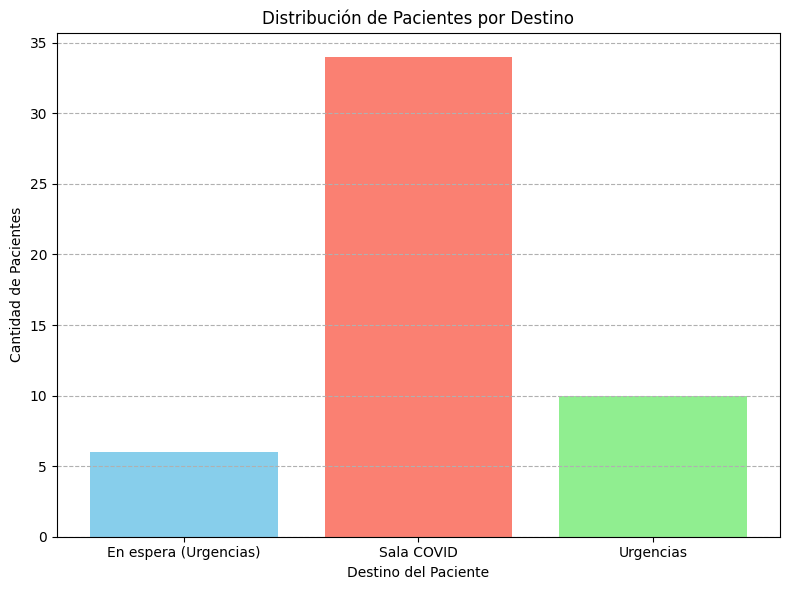

In [3]:
import csv
import random
import matplotlib.pyplot as plt

class Paciente:
    def __init__(self, nombre, saturacion, vacunas):
        self.nombre = nombre
        self.saturacion = saturacion
        self.vacunas = vacunas

    def realizar_prueba_covid(self):
        """Simula una prueba de COVID con una probabilidad del 30% de ser positiva."""
        return random.random() < 0.3

    def determinar_destino(self, camillas_disponibles):
        if self.saturacion < 90 or self.vacunas < 2:
            return "Sala COVID"
        else:
            if self.realizar_prueba_covid():
                return "Sala COVID"
            else:
                if camillas_disponibles > 0:
                    return "Urgencias"
                else:
                    return "En espera (Urgencias)"

class SalaEspera:
    def __init__(self, num_pacientes, camillas_urgencias):
        self.num_pacientes = num_pacientes
        self.camillas_urgencias = camillas_urgencias
        self.pacientes = []
        self.pacientes_en_urgencias = 0
        self.resultados = []

    def generar_pacientes(self):
        for i in range(self.num_pacientes):
            nombre = f"Paciente {i+1}"
            saturacion = random.randint(85, 98)
            vacunas = random.randint(0, 3)
            self.pacientes.append(Paciente(nombre, saturacion, vacunas))

    def procesar_pacientes(self):
        for paciente in self.pacientes:
            destino = paciente.determinar_destino(self.camillas_urgencias - self.pacientes_en_urgencias)
            self.resultados.append([paciente.nombre, paciente.saturacion, paciente.vacunas, destino])
            if destino == "Urgencias":
                self.pacientes_en_urgencias += 1

    def guardar_resultados(self, nombre_archivo="resultados_pacientes_poo.csv"):
        with open(nombre_archivo, "w", newline="") as archivo_csv:
            escritor = csv.writer(archivo_csv)
            escritor.writerow(["Paciente", "Saturacion", "Vacunas", "Destino"])
            escritor.writerows(self.resultados)
        print(f"Archivo '{nombre_archivo}' generado exitosamente con los destinos de los pacientes.")

    def generar_archivo_entrada(self, nombre_archivo="entrada_pacientes_poo.csv"):
        with open(nombre_archivo, "w", newline="") as archivo_csv:
            escritor = csv.writer(archivo_csv)
            escritor.writerow(["Paciente", "Saturacion", "Vacunas"])
            for paciente in self.pacientes:
                escritor.writerow([paciente.nombre, paciente.saturacion, paciente.vacunas])
        print(f"Archivo '{nombre_archivo}' generado exitosamente.")

    def generar_histograma_destinos(self, nombre_archivo="histograma_destinos.png"):
        destinos = [resultado[3] for resultado in self.resultados]
        conteo_destinos = {destino: destinos.count(destino) for destino in set(destinos)}

        nombres_destinos = list(conteo_destinos.keys())
        valores_destinos = list(conteo_destinos.values())

        plt.figure(figsize=(8, 6))
        plt.bar(nombres_destinos, valores_destinos, color=['skyblue', 'salmon', 'lightgreen'])
        plt.xlabel("Destino del Paciente")
        plt.ylabel("Cantidad de Pacientes")
        plt.title("Distribución de Pacientes por Destino")
        plt.grid(axis='y', linestyle='--')
        plt.tight_layout()
        plt.savefig(nombre_archivo)
        print(f"Histograma de destinos guardado como '{nombre_archivo}'.")


if __name__ == "__main__":
    sala = SalaEspera(num_pacientes=50, camillas_urgencias=10)
    sala.generar_pacientes()
    sala.generar_archivo_entrada()
    sala.procesar_pacientes()
    sala.guardar_resultados()
    sala.generar_histograma_destinos()

Emular el comportamiento de un sensor de humedad que registra 20 tomas en un día, entre los valores
de 0 a 10. Genere un sistema de alerta si la humedad disminuye por debajo de 3 (humedad baja) y si
supera los 8 (alta humedad).
De forma adicional, emule un actuador que:
a. Si la humedad está por debajo de una medición de 3, el sistema indique que abrirá el grifo.
b. Si la humedad está entre 3 a 8 grados de humedad y el grifo está abierto, indicará que cerrará
el grifo.
c. Si la humedad supera los 8 grados de humedad y si el grifo está abierto, indicará que cerrará
el grifo. Adicionalmente indica que iniciará un sistema para absorber el agua residual.

Archivo de entrada aleatorio 'entrada_humedad.csv' generado.
Archivo 'entrada_humedad.csv' protegido (solo lectura para el propietario).
--- Simulación del Sensor de Humedad ---
Toma 1: Humedad = 9.46
Humedad alta detectada. Iniciando sistema de absorción.
  Estado del Grifo: Cerrado, Alerta: Humedad Alta - Iniciando absorción
Toma 2: Humedad = 7.19
  Estado del Grifo: Cerrado, Alerta: 
Toma 3: Humedad = 4.08
  Estado del Grifo: Cerrado, Alerta: 
Toma 4: Humedad = 3.73
  Estado del Grifo: Cerrado, Alerta: 
Toma 5: Humedad = 1.51
Humedad baja detectada. Abriendo el grifo.
  Estado del Grifo: Abierto, Alerta: Humedad Baja
Toma 6: Humedad = 3.07
Humedad en rango normal. Cerrando el grifo.
  Estado del Grifo: Cerrado, Alerta: 
Toma 7: Humedad = 0.19
Humedad baja detectada. Abriendo el grifo.
  Estado del Grifo: Abierto, Alerta: Humedad Baja
Toma 8: Humedad = 5.11
Humedad en rango normal. Cerrando el grifo.
  Estado del Grifo: Cerrado, Alerta: 
Toma 9: Humedad = 3.28
  Estado del Grifo: Cer

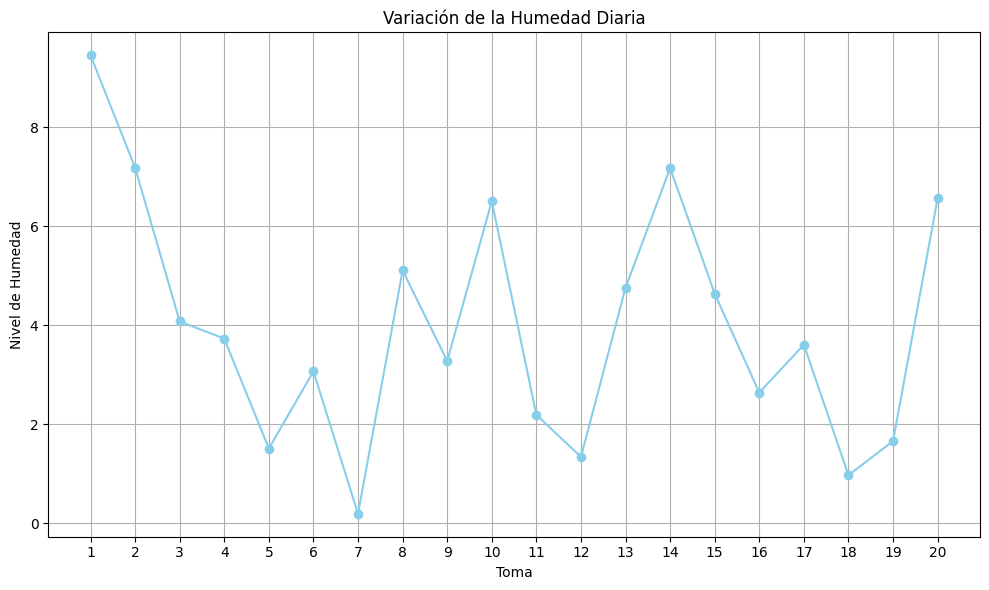

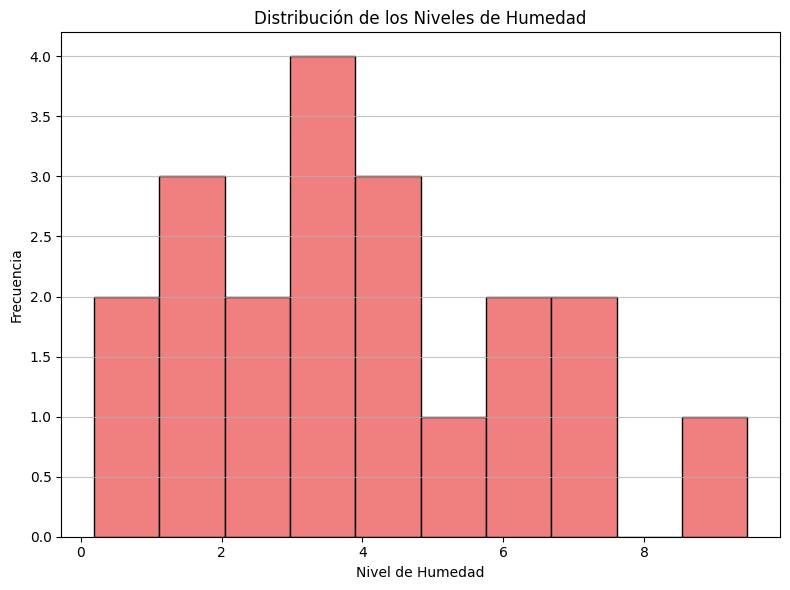

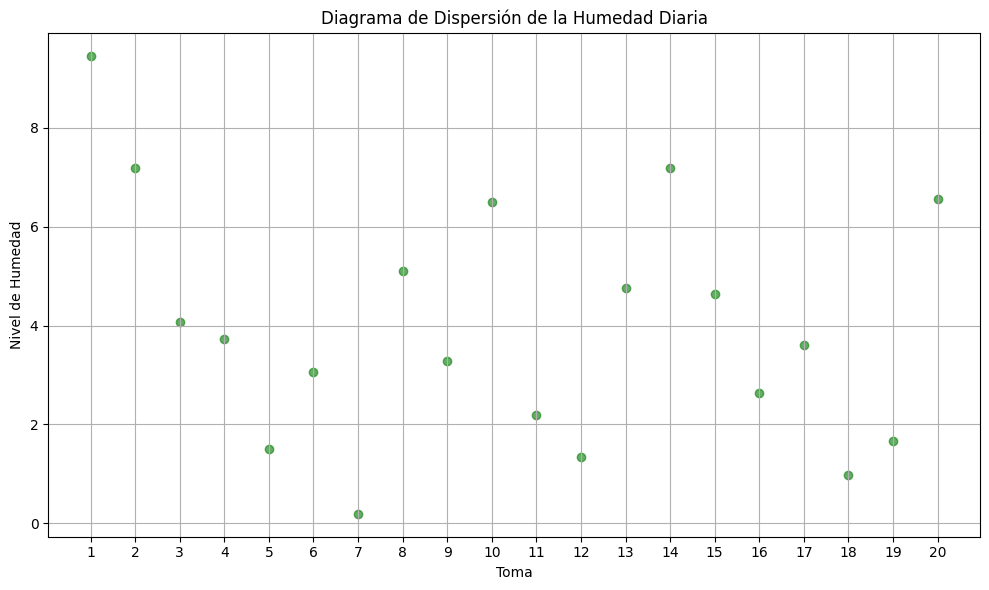

In [33]:
import csv
import random
import os
import matplotlib.pyplot as plt

class SensorHumedad:
    def __init__(self, archivo_entrada="entrada_humedad.csv", num_tomas=20):
        self.archivo_entrada = archivo_entrada
        self.num_tomas = num_tomas
        self._crear_archivo_entrada()  # Corrección: '_crear' en lugar de '_generar'
        self.lecturas = self._leer_lecturas()

    def _generar_lecturas_aleatorias(self):
        return [random.uniform(0, 10) for _ in range(self.num_tomas)]

    def _crear_archivo_entrada(self):
        lecturas = self._generar_lecturas_aleatorias()
        with open(self.archivo_entrada, "w", newline="") as archivo_csv:
            escritor = csv.writer(archivo_csv)
            escritor.writerow(["Humedad"])
            for lectura in lecturas:
                escritor.writerow([f"{lectura:.2f}"])
        print(f"Archivo de entrada aleatorio '{self.archivo_entrada}' generado.")
        self._proteger_archivo(self.archivo_entrada)

    def _leer_lecturas(self):
        lecturas = []
        try:
            with open(self.archivo_entrada, "r") as archivo_csv:
                lector = csv.reader(archivo_csv)
                next(lector)  # Saltar encabezado
                for fila in lector:
                    lecturas.append(float(fila[0]))
        except FileNotFoundError:
            print(f"Archivo de entrada '{self.archivo_entrada}' no encontrado. Generando uno nuevo.")
            self._crear_archivo_entrada()
            return self._leer_lecturas()
        return lecturas

    def obtener_lecturas(self):
        return self.lecturas

    def _proteger_archivo(self, nombre_archivo):
        try:
            os.chmod(nombre_archivo, 0o400)  # Establecer permisos de solo lectura para el propietario
            print(f"Archivo '{nombre_archivo}' protegido (solo lectura para el propietario).")
        except Exception as e:
            print(f"Error al intentar proteger el archivo '{nombre_archivo}': {e}")

class ActuadorHumedad:
    def __init__(self):
        self.grifo_abierto = False
        self.alerta = ""

    def actualizar_estado(self, humedad):
        self.alerta = ""
        if humedad < 3:
            if not self.grifo_abierto:
                print("Humedad baja detectada. Abriendo el grifo.")
                self.grifo_abierto = True
            else:
                print("Humedad baja detectada. El grifo ya está abierto.")
            self.alerta = "Humedad Baja"
        elif 3 <= humedad <= 8:
            if self.grifo_abierto:
                print("Humedad en rango normal. Cerrando el grifo.")
                self.grifo_abierto = False
        elif humedad > 8:
            if self.grifo_abierto:
                print("Humedad alta detectada. Cerrando el grifo e iniciando sistema de absorción.")
                self.grifo_abierto = False
                self.alerta = "Humedad Alta - Iniciando absorción"
            else:
                print("Humedad alta detectada. Iniciando sistema de absorción.")
                self.alerta = "Humedad Alta - Iniciando absorción"

    def esta_grifo_abierto(self):
        return self.grifo_abierto

    def obtener_alerta(self):
        return self.alerta

class SistemaHumedad:
    def __init__(self):
        self.sensor = SensorHumedad()
        self.actuador = ActuadorHumedad()
        self.registro_diario = []
        self.nombre_archivo_resultados = "resultados_humedad.csv"

    def simular_dia(self):
        self.registro_diario = self.sensor.obtener_lecturas()
        print("--- Simulación del Sensor de Humedad ---")
        for i, humedad in enumerate(self.registro_diario):
            print(f"Toma {i+1}: Humedad = {humedad:.2f}")
            self.actuador.actualizar_estado(humedad)
            alerta = self.actuador.obtener_alerta()
            estado_grifo = "Abierto" if self.actuador.esta_grifo_abierto() else "Cerrado"
            print(f"  Estado del Grifo: {estado_grifo}, Alerta: {alerta}")
        self._generar_archivo_resultados()
        self.mostrar_graficos()

    def _generar_archivo_resultados(self):
        try:
            with open(self.nombre_archivo_resultados, "w", newline="") as archivo_csv:
                escritor = csv.writer(archivo_csv)
                escritor.writerow(["Toma", "Humedad", "Grifo Abierto", "Alerta"])
                for i, humedad in enumerate(self.registro_diario):
                    estado_grifo = "Sí" if self.actuador.esta_grifo_abierto() else "No"
                    temp_actuador = ActuadorHumedad()
                    temp_actuador.grifo_abierto = self.actuador.grifo_abierto
                    temp_actuador.actualizar_estado(humedad)
                    alerta_momento = temp_actuador.obtener_alerta()
                    escritor.writerow([i + 1, f"{humedad:.2f}", estado_grifo, alerta_momento])
            print(f"Archivo de resultados '{self.nombre_archivo_resultados}' generado.")
            self._proteger_archivo(self.nombre_archivo_resultados)
        except Exception as e:
            print(f"Error al generar el archivo de resultados: {e}")

    def _proteger_archivo(self, nombre_archivo):
        try:
            os.chmod(nombre_archivo, 0o400)  # Establecer permisos de solo lectura para el propietario
            print(f"Archivo '{nombre_archivo}' protegido (solo lectura para el propietario).")
        except Exception as e:
            print(f"Error al intentar proteger el archivo '{nombre_archivo}': {e}")

    def mostrar_graficos(self):
        # Gráfico de línea de la humedad diaria
        plt.figure(figsize=(10, 6))
        plt.plot(range(1, len(self.registro_diario) + 1), self.registro_diario, marker='o', linestyle='-', color='skyblue')
        plt.title("Variación de la Humedad Diaria")
        plt.xlabel("Toma")
        plt.ylabel("Nivel de Humedad")
        plt.grid(True)
        plt.xticks(range(1, len(self.registro_diario) + 1))
        plt.tight_layout()
        plt.show()

        # Histograma de la distribución de la humedad
        plt.figure(figsize=(8, 6))
        plt.hist(self.registro_diario, bins=10, color='lightcoral', edgecolor='black')
        plt.title("Distribución de los Niveles de Humedad")
        plt.xlabel("Nivel de Humedad")
        plt.ylabel("Frecuencia")
        plt.grid(axis='y', alpha=0.75)
        plt.tight_layout()
        plt.show()

        # Diagrama de dispersión de la humedad vs. tiempo (toma)
        plt.figure(figsize=(10, 6))
        plt.scatter(range(1, len(self.registro_diario) + 1), self.registro_diario, color='forestgreen', alpha=0.7)
        plt.title("Diagrama de Dispersión de la Humedad Diaria")
        plt.xlabel("Toma")
        plt.ylabel("Nivel de Humedad")
        plt.grid(True)
        plt.xticks(range(1, len(self.registro_diario) + 1))
        plt.tight_layout()
        plt.show()

if __name__ == "__main__":
    sistema = SistemaHumedad()
    sistema.simular_dia()

In [34]:
import pandas as pd

# Leer el archivo de entrada
df_entrada = pd.read_csv("entrada_humedad.csv")
print("Contenido de entrada_humedad.csv:")
print(df_entrada)

# Leer el archivo de resultados
df_resultados = pd.read_csv("resultados_humedad.csv")
print("\nContenido de resultados_humedad.csv:")
print(df_resultados)

Contenido de entrada_humedad.csv:
    Humedad
0      9.46
1      7.19
2      4.08
3      3.73
4      1.51
5      3.07
6      0.19
7      5.11
8      3.28
9      6.51
10     2.19
11     1.34
12     4.76
13     7.18
14     4.64
15     2.64
16     3.61
17     0.97
18     1.66
19     6.57

Contenido de resultados_humedad.csv:
    Toma  Humedad Grifo Abierto                              Alerta
0      1     9.46            No  Humedad Alta - Iniciando absorción
1      2     7.19            No                                 NaN
2      3     4.08            No                                 NaN
3      4     3.73            No                                 NaN
4      5     1.51            No                        Humedad Baja
5      6     3.07            No                                 NaN
6      7     0.19            No                        Humedad Baja
7      8     5.11            No                                 NaN
8      9     3.28            No                                 

Emular el comportamiento del dólar en un día. Considere que la base está en 4000 pesos y que durante
el día tendrá subidas y bajadas. Tome al menos un registro de 20 datos, y que la aleatoriedad debe
darse entre 0 a 2000 pesos. Si el dólar sube por encima de 5000 pesos, el sistema deberá emitir un
comunicado sobre su subida. Si el dólar se encuentra por debajo de los 3000 pesos, se deberá emitir
un comunicado sobre su bajada. Al terminar las 20 mediciones, el sistema debe emitir un comunicado
que diga que el precio del dólar cerró en ese valor, e indicar si cerró a la baja (su valor fue inferior al
valor anterior) o al alta (su valor fue superior al valor anterior).

Archivo de entrada aleatorio 'entrada_dolar.csv' generado.
--- Simulación del Precio del Dólar ---
Registro 1: Precio = 4140.65 pesos, Fluctuación = 140.65
Registro 2: Precio = 4115.64 pesos, Fluctuación = -25.01
Registro 3: Precio = 4184.74 pesos, Fluctuación = 69.10
Registro 4: Precio = 4187.98 pesos, Fluctuación = 3.24
Registro 5: Precio = 4051.03 pesos, Fluctuación = -136.95
Registro 6: Precio = 4088.32 pesos, Fluctuación = 37.29
Registro 7: Precio = 3972.31 pesos, Fluctuación = -116.01
Registro 8: Precio = 3965.27 pesos, Fluctuación = -7.04
Registro 9: Precio = 3925.30 pesos, Fluctuación = -39.97
Registro 10: Precio = 3776.76 pesos, Fluctuación = -148.54
Registro 11: Precio = 3616.21 pesos, Fluctuación = -160.55
Registro 12: Precio = 3629.17 pesos, Fluctuación = 12.96
Registro 13: Precio = 3640.16 pesos, Fluctuación = 10.99
Registro 14: Precio = 3476.44 pesos, Fluctuación = -163.72
Registro 15: Precio = 3659.38 pesos, Fluctuación = 182.94
Registro 16: Precio = 3651.70 pesos, Fluct

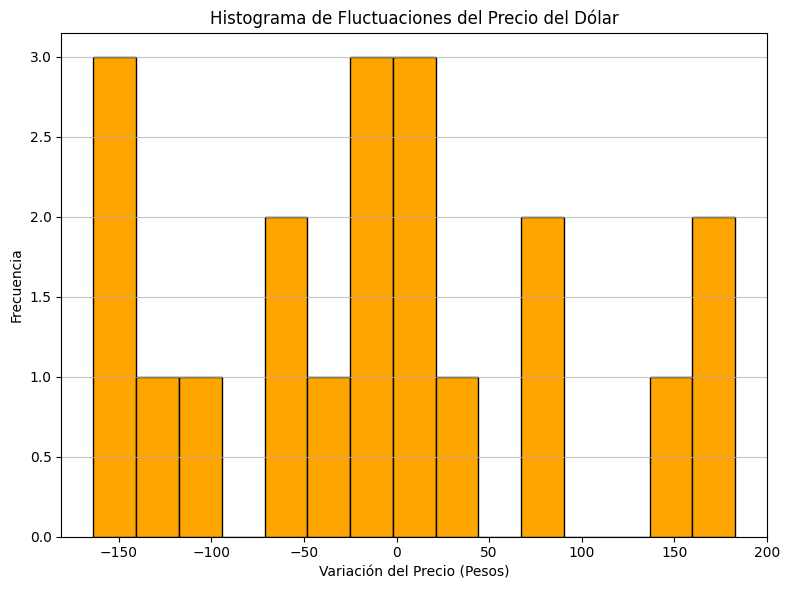

In [20]:
import random
import csv
import matplotlib.pyplot as plt

class Dolar:
    def __init__(self, base=4000):
        self.precio = base
        self.historial = [base]

    def fluctuar(self, cambio):
        self.precio += cambio
        if self.precio < 0:
            self.precio = 0
        self.historial.append(self.precio)
        return self.precio

    def obtener_precio_actual(self):
        return self.precio

    def obtener_historial(self):
        return self.historial

class SistemaDolar:
    def __init__(self, dolar, archivo_entrada="entrada_dolar.csv", archivo_resultados="resultados_dolar.csv"):
        self.dolar = dolar
        self.archivo_entrada = archivo_entrada
        self.archivo_resultados = archivo_resultados
        self.num_registros = 20
        self._generar_archivo_entrada()
        self.fluctuaciones_diarias = self._leer_archivo_entrada()

    def _generar_archivo_entrada(self):
        fluctuaciones = [random.uniform(-200, 200) for _ in range(self.num_registros)]
        with open(self.archivo_entrada, "w", newline="") as archivo_csv:
            escritor = csv.writer(archivo_csv)
            escritor.writerow(["Fluctuacion"])
            for cambio in fluctuaciones:
                escritor.writerow([f"{cambio:.2f}"])
        print(f"Archivo de entrada aleatorio '{self.archivo_entrada}' generado.")

    def _leer_archivo_entrada(self):
        try:
            with open(self.archivo_entrada, "r") as archivo_csv:
                lector = csv.reader(archivo_csv)
                next(lector)  # Saltar encabezado
                return [float(fila[0]) for fila in lector]
        except FileNotFoundError:
            print(f"Archivo de entrada '{self.archivo_entrada}' no encontrado. Generando uno nuevo.")
            self._generar_archivo_entrada()
            return self._leer_archivo_entrada()

    def simular_dia(self):
        print("--- Simulación del Precio del Dólar ---")
        precio_anterior = self.dolar.obtener_precio_actual()
        for i, cambio in enumerate(self.fluctuaciones_diarias):
            precio_actual = self.dolar.fluctuar(cambio)
            print(f"Registro {i+1}: Precio = {precio_actual:.2f} pesos, Fluctuación = {cambio:.2f}")
            if precio_actual > 5000:
                print("¡COMUNICADO! El dólar ha superado los 5000 pesos.")
            elif precio_actual < 3000:
                print("¡COMUNICADO! El dólar ha caído por debajo de los 3000 pesos.")
            precio_anterior = precio_actual

        precio_cierre = self.dolar.obtener_precio_actual()
        tendencia_cierre = "al alza" if precio_cierre > self.dolar.obtener_historial()[-2] else "a la baja"
        print(f"\n--- Cierre del Día ---")
        print(f"El precio del dólar cerró en {precio_cierre:.2f} pesos, {tendencia_cierre}.")
        self._generar_archivo_resultados()

    def obtener_historial_precios(self):
        return self.dolar.obtener_historial()

    def generar_grafico_precio(self, nombre_archivo="precio_dolar_dia.png"):
        historial = self.obtener_historial_precios()
        plt.figure(figsize=(10, 6))
        plt.plot(range(len(historial)), historial, marker='o', linestyle='-', color='blue')
        plt.title("Comportamiento del Precio del Dólar Durante el Día")
        plt.xlabel("Registro")
        plt.ylabel("Precio (Pesos)")
        plt.grid(True)
        plt.xticks(range(len(historial)))
        plt.tight_layout()
        plt.savefig(nombre_archivo)
        print(f"Gráfico del precio del dólar guardado como '{nombre_archivo}'.")
        plt.close()

    def mostrar_histograma_fluctuaciones(self):
        historial = self.obtener_historial_precios()
        fluctuaciones = [historial[i+1] - historial[i] for i in range(len(historial) - 1)]
        plt.figure(figsize=(8, 6))
        plt.hist(fluctuaciones, bins=15, color='orange', edgecolor='black')
        plt.title("Histograma de Fluctuaciones del Precio del Dólar")
        plt.xlabel("Variación del Precio (Pesos)")
        plt.ylabel("Frecuencia")
        plt.grid(axis='y', alpha=0.75)
        plt.tight_layout()
        plt.show()

    def _generar_archivo_resultados(self):
        historial = self.obtener_historial_precios()
        with open(self.archivo_resultados, "w", newline="") as archivo_csv:
            escritor = csv.writer(archivo_csv)
            escritor.writerow(["Registro", "Precio"])
            for i, precio in enumerate(historial):
                escritor.writerow([i, f"{precio:.2f}"])
        print(f"Archivo de resultados '{self.archivo_resultados}' generado.")


if __name__ == "__main__":
    dolar_hoy = Dolar(base=4000)
    sistema = SistemaDolar(dolar_hoy)
    sistema.simular_dia()
    sistema.generar_grafico_precio()
    sistema.mostrar_histograma_fluctuaciones()

2. Desarrollar un sistema que indique de m personas, a cuántas se les dará el crédito o no. El sistema
deberá generar un aviso indicando si la persona puede obtener el crédito (esto es cuando obtiene
una puntuación mayor o igual a 6 puntos). De cada persona debe evaluar:
a. 1 punto: Si posee tarjetas con otras franquicias.
b. 3 puntos: Si no está reportado ante entidades de riesgo.
c. 2 puntos: Si se encuentra laborando a término definido.
d. 3 puntos: Si se encuentra laborando a término indefinido.
e. 2 puntos: Si ya había obtenido créditos con anterioridad en otra entidad bancaria
f. 3 puntos: Si ya había obtenido crédito en la misma entidad bancaria.
g. 2 puntos: Si la edad de la persona oscila entre los 18 a los 22 años.
h. 4 puntos: Si la edad de la persona oscila entre los 23 y 30 años.
i. 3 puntos: Si la edad de la persona oscila entre los 31 y 40 años.
j. 1 punto: Si la edad de la persona es mayor a 41 años.

Archivo de entrada aleatorio 'entrada_credito.csv' generado.
Persona 1: Puntaje = 6, Crédito = APROBADO
Persona 2: Puntaje = 5, Crédito = RECHAZADO
Persona 3: Puntaje = 9, Crédito = APROBADO
Persona 4: Puntaje = 10, Crédito = APROBADO
Persona 5: Puntaje = 6, Crédito = APROBADO
Persona 6: Puntaje = 8, Crédito = APROBADO
Persona 7: Puntaje = 7, Crédito = APROBADO
Persona 8: Puntaje = 12, Crédito = APROBADO
Persona 9: Puntaje = 13, Crédito = APROBADO
Persona 10: Puntaje = 4, Crédito = RECHAZADO
Persona 11: Puntaje = 4, Crédito = RECHAZADO
Persona 12: Puntaje = 11, Crédito = APROBADO
Persona 13: Puntaje = 11, Crédito = APROBADO
Persona 14: Puntaje = 9, Crédito = APROBADO
Persona 15: Puntaje = 8, Crédito = APROBADO
Persona 16: Puntaje = 5, Crédito = RECHAZADO
Persona 17: Puntaje = 11, Crédito = APROBADO
Persona 18: Puntaje = 6, Crédito = APROBADO
Persona 19: Puntaje = 3, Crédito = RECHAZADO
Persona 20: Puntaje = 12, Crédito = APROBADO
Persona 21: Puntaje = 7, Crédito = APROBADO
Persona 22: 

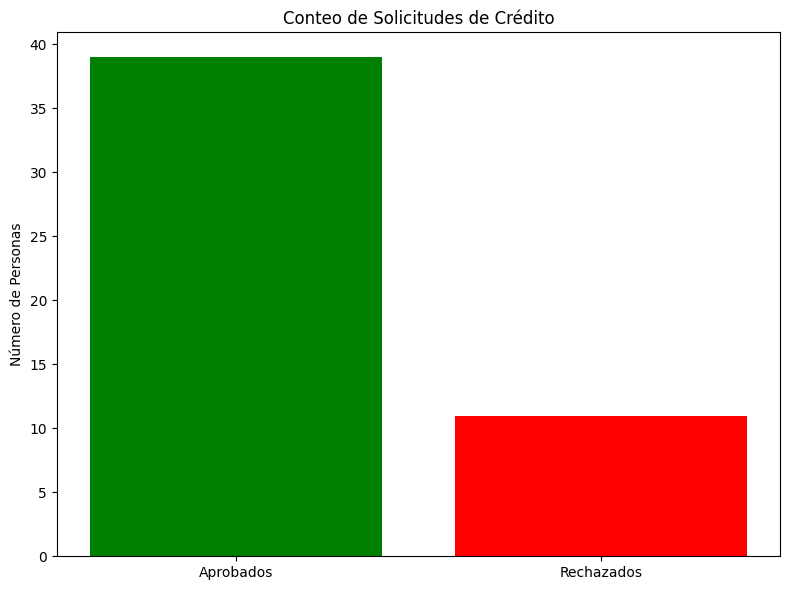

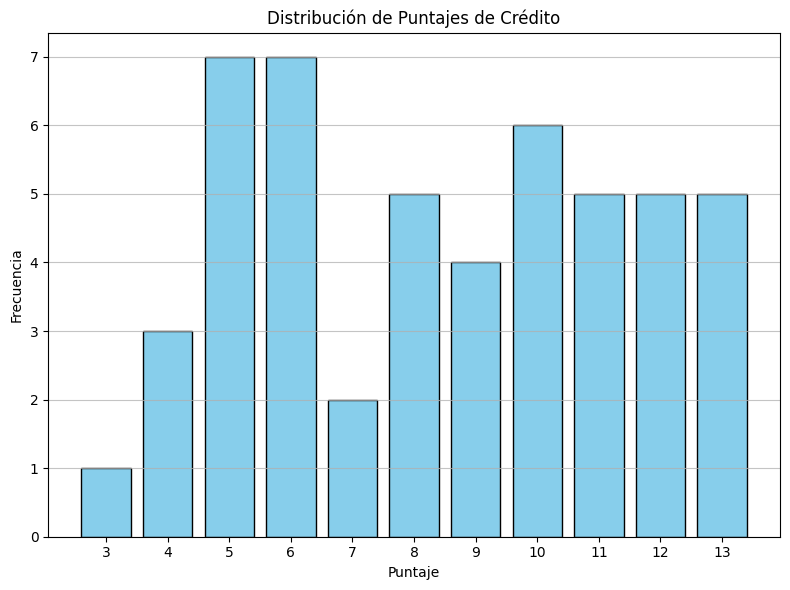

In [26]:
import random
import csv
import matplotlib.pyplot as plt

class PersonaCredito:
    def __init__(self, nombre, tiene_otras_tarjetas, sin_reporte_riesgo, tipo_contrato,
                 credito_otra_entidad, credito_misma_entidad, edad):
        self.nombre = nombre
        self.tiene_otras_tarjetas = tiene_otras_tarjetas
        self.sin_reporte_riesgo = sin_reporte_riesgo
        self.tipo_contrato = tipo_contrato
        self.credito_otra_entidad = credito_otra_entidad
        self.credito_misma_entidad = credito_misma_entidad
        self.edad = edad
        self.puntaje = self.calcular_puntaje()
        self.aprobado = self.puede_obtener_credito()

    def calcular_puntaje(self):
        puntaje = 0
        if self.tiene_otras_tarjetas:
            puntaje += 1
        if self.sin_reporte_riesgo:
            puntaje += 3
        if self.tipo_contrato == "definido":
            puntaje += 2
        elif self.tipo_contrato == "indefinido":
            puntaje += 3
        if self.credito_otra_entidad:
            puntaje += 2
        if self.credito_misma_entidad:
            puntaje += 3
        if 18 <= self.edad <= 22:
            puntaje += 2
        elif 23 <= self.edad <= 30:
            puntaje += 4
        elif 31 <= self.edad <= 40:
            puntaje += 3
        elif self.edad > 40:
            puntaje += 1
        return puntaje

    def puede_obtener_credito(self):
        return self.puntaje >= 6

class SistemaCredito:
    def __init__(self, num_personas, archivo_entrada="entrada_credito.csv", archivo_resultados="resultados_credito.csv"):
        self.num_personas = num_personas
        self.archivo_entrada = archivo_entrada
        self.archivo_resultados = archivo_resultados
        self._generar_archivo_entrada()
        self.personas = self._leer_personas()
        self.resultados = self._evaluar_credito()
        self._generar_archivo_resultados()

    def _generar_persona_aleatoria(self, i):
        nombre = f"Persona {i+1}"
        tiene_otras_tarjetas = random.choice([True, False])
        sin_reporte_riesgo = random.choice([True, False])
        tipo_contrato = random.choice(["definido", "indefinido", "otro"])
        credito_otra_entidad = random.choice([True, False])
        credito_misma_entidad = random.choice([True, False])
        edad = random.randint(18, 65)
        return [nombre, tiene_otras_tarjetas, sin_reporte_riesgo, tipo_contrato,
                credito_otra_entidad, credito_misma_entidad, edad]

    def _generar_archivo_entrada(self):
        with open(self.archivo_entrada, "w", newline="") as archivo_csv:
            escritor = csv.writer(archivo_csv)
            escritor.writerow(["Nombre", "OtrasTarjetas", "SinReporte", "Contrato",
                               "CreditoOtra", "CreditoMisma", "Edad"])
            for i in range(self.num_personas):
                persona_data = self._generar_persona_aleatoria(i)
                escritor.writerow(persona_data)
        print(f"Archivo de entrada aleatorio '{self.archivo_entrada}' generado.")

    def _leer_personas(self):
        personas = []
        try:
            with open(self.archivo_entrada, "r") as archivo_csv:
                lector = csv.reader(archivo_csv)
                next(lector)  # Saltar encabezado
                for fila in lector:
                    nombre = fila[0]
                    tiene_otras_tarjetas = fila[1].lower() == 'true'
                    sin_reporte_riesgo = fila[2].lower() == 'true'
                    tipo_contrato = fila[3]
                    credito_otra_entidad = fila[4].lower() == 'true'
                    credito_misma_entidad = fila[5].lower() == 'true'
                    edad = int(fila[6])
                    persona = PersonaCredito(nombre, tiene_otras_tarjetas, sin_reporte_riesgo,
                                             tipo_contrato, credito_otra_entidad, credito_misma_entidad, edad)
                    personas.append(persona)
        except FileNotFoundError:
            print(f"Archivo de entrada '{self.archivo_entrada}' no encontrado. Generando uno nuevo.")
            self._generar_archivo_entrada()
            return self._leer_personas()
        return personas

    def _evaluar_credito(self):
        resultados = []
        for persona in self.personas:
            aviso = "APROBADO" if persona.aprobado else "RECHAZADO"
            print(f"{persona.nombre}: Puntaje = {persona.puntaje}, Crédito = {aviso}")
            resultados.append([persona.nombre, persona.puntaje, aviso])
        return resultados

    def _generar_archivo_resultados(self):
        try:
            with open(self.archivo_resultados, "w", newline="") as archivo_csv:
                escritor = csv.writer(archivo_csv)
                escritor.writerow(["Nombre", "Puntaje", "Resultado Crédito"])
                escritor.writerows(self.resultados)
            print(f"Archivo de resultados '{self.archivo_resultados}' generado.")
            # Aquí se podría implementar la protección del archivo (ej. encriptación)
            # Esto dependerá de la librería o método de protección que se desee usar.
            # Por simplicidad, en este ejemplo no se incluye la protección.
        except Exception as e:
            print(f"Error al generar el archivo de resultados: {e}")

    def mostrar_graficos(self):
        aprobados = sum(1 for _, _, resultado in self.resultados if resultado == "APROBADO")
        rechazados = self.num_personas - aprobados

        # Gráfico de barras del conteo de aprobados y rechazados
        plt.figure(figsize=(8, 6))
        nombres = ["Aprobados", "Rechazados"]
        conteos = [aprobados, rechazados]
        plt.bar(nombres, conteos, color=['green', 'red'])
        plt.title("Conteo de Solicitudes de Crédito")
        plt.ylabel("Número de Personas")
        plt.tight_layout()
        plt.show()

        # Histograma de la distribución de los puntajes
        puntajes = [resultado[1] for resultado in self.resultados]
        plt.figure(figsize=(8, 6))
        plt.hist(puntajes, bins=range(min(puntajes), max(puntajes) + 2), align='left', rwidth=0.8, color='skyblue', edgecolor='black')
        plt.title("Distribución de Puntajes de Crédito")
        plt.xlabel("Puntaje")
        plt.ylabel("Frecuencia")
        plt.xticks(range(min(puntajes), max(puntajes) + 1))
        plt.grid(axis='y', alpha=0.75)
        plt.tight_layout()
        plt.show()

# Paso 3: Ejecución del sistema
if __name__ == "__main__":
    num_personas_evaluar = 50  # Puedes cambiar este número
    sistema = SistemaCredito(num_personas_evaluar)
    sistema.mostrar_graficos()